**(Análise Demográfica III (DM003)**

Laboratório 2: Métodos para mensuração da cobertura do registro de óbitos da mortalidade adulta

Carlos Eduardo Beluzo
c095402@dac.unicamp.br


# Introdução

O estudo do nível e padrão da mortalidade e também a obtenção de estimativas confiáveis são muito importantes na compreensão da dinâmica demográfica e no planejamento fiscal e de políticas sociais, especialmente nas áreas de saúde e previdência (Agostinho, 2008). Estimar a mortalidade é um desafio, uma vez que a qualidade da informação geralmente não é satisfatória (Jorge e Gotlieb, 2000; Ministério da Saúde, 2001 apud Agostinho, 2008). As dificuldades existentes nas fontes de dados utilizadas na estimativa da mortalidade estão relacionadas à incompleta cobertura do registro de óbitos e a erros na declaração da idade, tanto no registro de óbito quanto nos dados de população (United Nations, 1983; Preston, Elo, Stewart, 1999 apud Agostinho, 2008). Para contornar esses problemas dos dados, diferentes metodologias foram desenvolvidas para se mensurar a mortalidade adulta de forma indireta (Brass, 1975; Preston et al., 1980; Bennett e Horiuchi, 1981; Hill, 1987; Hill e Choi, 2004 apud Agostinho, 2008).

O objetivo deste trabalho é mensurar a qualidade do registro de óbitos da mortalidade adulta de homens no estados do Amazonas em 2010 a paritr do SIM-Datasus. Além idsso pretende-se também apresentar estimativas de fatores de correção de cobertura dos registro da declaração de óbitos, e produzir estimativas de mortalidade adulta. Considerando que temos disponibilidade de dados dos censos de 2000 e 2010, este trabalho será realizado utilizando métodos baseados em dados dois censos. Especificamente serão aplicados os métodos: (1) General Growth Balance (GGB) e (2) Synthetic Extinct Generation (SEG).

# Metodologia

Conforme colocado no trabalho de Agostinho (2008):

    "Os métodos usados na estimativa da cobertura do registro de mortes avaliam a cobertura do registro de óbitos 
    comparando a distribuição etária de mortes com a distribuição etária da população (proveniente de censos ou surveys). 
    Se a cobertura do registro de mortes relativa à cobertura do registro de pessoas pode ser estimada, 
    os dados de mortalidade podem ser ajustados por esse diferencial de cobertura e um padrão de mortalidade não viesado é 
    calculado por idades em determinado período".

Este trabalho utiliza como fontes dados informações dos Censos de 2000 e 2010, para extrair o número de homens no estado do Amazonas (AM) ([dados](https://sidra.ibge.gov.br/Tabela/200#resultado)). Adicionalmente, utiliza-se ainda como fonte de dados o Sistema de Mortalidade ([SIM](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?sim/cnv/obt10AM.def)), para extração do número total de mortes para homens no período de 2000 e 2010. Importante ressaltar que neste período sabe-se que foi observado no AM um saldo migratório interestadual positivo e relevante, entratando vamos presupor que a população é fechada, por uma mera questão de simplificação da aplicação do método. Os dados que serão utilizados como insumo de entrada para os métodos estão apresentados na Tabela 1.

Após aplicação dos métodos, serão apresentados como resultados os gráficos para diagnósticos e respectivas interpretações. Serão apresentandos também análises comparativas dos resultados dos valores da probabilidade de morte (q(x)) ajustados versus observados, assim como entre os dois métodos utilizados neste trabalho. Também será realizada uma comparação com valores q(x) estimados de uma tábua de vida.

Tabela 1. População de homens no Amazonas em 2000, 2010 segundo respectivos censos; e total de óbitos do período 2000 a 2010 segundo SIM. (Fontes: Censo 2000 e 2010; SIM)

In [1]:
library(repr) # for ggplot size

# População em 2000, 2010 e óbitos em 2010 (Censo e SIM respectivamente)
dataSource = "https://raw.githubusercontent.com/cbeluzo/DM003/main/Lab2/AM-2000-2010-Censo-SIM-Masc.csv"
df = read.csv(dataSource, sep=';', header = T)

# Variáveis auxiliares
ultimaLinha = length(df$idade)
periodoTempo = 10

tabGGB = df

# tabAux apenas para formatação da tabela
tabAux = tabGGB
colnames(tabAux) <- c("Idade", "N(t1)", "N(t2)", "D(x)")
tabAux

Idade,N(t1),N(t2),D(x)
0 a 4 anos,195735,188167,989
5 a 9 anos,187618,195995,84
10 a 14 anos,170928,203418,79
15 a 19 anos,167067,182546,239
20 a 24 anos,144214,170242,358
25 a 29 anos,116531,161273,328
30 a 34 anos,96706,142710,290
35 a 39 anos,84397,116794,279
40 a 44 anos,67150,98058,306
45 a 49 anos,52303,80209,335


# Resultados e Discussões

## Aplicação do método General Growth Balance (GGB)

O método General Growth Balance (GGB) proposto por Hill (1987) é uma generalização do método Brass Growth Balance (BGB) proposto por Brass (1975), 
e é aplicado para populações não estáveis, mas mantém os demais pressupostos. Essa generalização pode ser usada quando se tem dados sobre os números por faixa etária de dois censos e uma estimativa do número de óbitos por faixa etária entre as datas dos dois censos. Com isso, é possível estimar as taxas de crescimento específicas por idade (diferente do pressuposto de estabilidadeda, onde consideram-se taxa intrínseca de crescimento constante). O método ainda pressupõe, no entanto, que a proporção de mortes notificadas e a completude das contagens censitárias são as mesmas em todas as idades adultas e que, além disso os dados são relatados com precisão. Por fim, assume-se ainda que a população está fechada para a migração, embora o método possa ser adaptado para acomodar a migração se houver dados disponíveis (GGB-IUSSP, 2020) . Resumindo, no método BGB assume-se os seguintes pressupostos:

 * População estável, embora essa suposição possa ser flexibilizada;
 * Integralidade do relato de mortes é similar para todas as idades acima de uma idade mínima (geralmente 15 anos);
 * População fechada à migração, embora esta suposição também possa ser flexibilizada, se a migração líquida for pequena em relação às taxas de mortalidade, ou se são conhecidas as estimativas do número de migrantes por idade, para que possa ser incluinda nas estimativas;

já o método GGB:

 * População não estável;
 * A cobertura de cada censo é a mesma para todas as idades;
 * Demais pressupostos do BGB.
 

Para os cálculos vamos considerar N(t1) sendo a população do primeiro censo, N(t2) a população do segundo censo e D(x) a média de mortes por ano no período (para cada um dos grupos quinquenais). Para estimar as taxas parciais de natalidade b(x+) e mortalidade d(x+) é necessário acumular os números da população (N1(x+) e N2(x+)) e o número de mortes (D(x+)) para as idades x e mais velhas (x+). Em seguida é necessário estimar os anos de exposição por pessoa PYL(x+), e o número de pessoas que 'nasceram' no intervalo de idade aberto (x+) na população N(x), estimada utilizando uma média geométrica. Por fim, são calculadas as taxas parcias de crescimento r(x+) e de mortalidade d(x+), para posterior cálculo da mortalidade residual d(x1). A definição formal das fórmulas está d está disponível na documentação do "Tools for Demographic Estimation" do [IUSSP](http://demographicestimation.iussp.org/content/generalized-growth-balance-method) (GGB-IUSSP, 2020)). A Tabela 2 apresenta o resultado dos cálculos das funções utilizadas pelo método GGB. Nesta tabela foram calculados:

* N1(x+): População acumulada para P1 início do período;
* N2(x+): População acumulada no fim do período;
* D(x+): Mortes acumuladas no fim do período;
* PYL(x+): Pessoas-anos vividos até idade x+ (Nx+), calcula por uma média geométrica;
* N(x): O número de pessoas que 'nasceram' no intervalo de idade aberto x+ na população ("Aniversário");
* r(x+): Taxa de crescimento partial;
* d(x+): Taxas específicas de mortalidade parcial;
* d(x1): Mortalidade residual.

Tabela 2. Funções do método GGB.

In [2]:
# N1(x+)
tabGGB$pop1_a_mais = (rev(cumsum(rev(tabGGB$pop1))))

# N2(x+)
tabGGB$pop2_a_mais = (rev(cumsum(rev(tabGGB$pop2))))

# D(x+)
tabGGB$morte_a_mais = (rev(cumsum(rev(tabGGB$mortes))))

# PYL(x+)
tabGGB$Lx_a_mais = round(sqrt(as.numeric(tabGGB$pop1_a_mais) * as.numeric(tabGGB$pop2_a_mais)))

# N(x)
tabGGB$aniversario = 0

for (i in 2:ultimaLinha) {
  popFaixaAnterior = as.numeric(tabGGB$pop1[i-1]) 
  popFaixaAtual = as.numeric(tabGGB$pop2[i])
  tabGGB$aniversario[i] = round((1/5) * sqrt(popFaixaAnterior * popFaixaAtual))
}

# r(x+)
tabGGB$cresc_mais = round(log(tabGGB$pop2_a_mais/tabGGB$pop1_a_mais)/periodoTempo, 5)

# d(x+)
tabGGB$d_a_mais = round(tabGGB$morte_a_mais/tabGGB$Lx_a_mais, 5)

# d(x1) = b(x+) - r(x+) = e(x+) - r(x+) = Esse é o residual. Mortalidade residual. 
tabGGB$d_a_1 = round((tabGGB$aniversario/tabGGB$Lx_a_mais) - tabGGB$cresc_mais, 5)

tabAux = tabGGB
colnames(tabAux) <- c("Idade", "N(t1)", "N(t2)", "D(x)", "N1(x+)", "N2(x+)", "D(x+)", "N(x)", "PYL(x+)", "r(x+)", "d(x+)", "d(x1)")

tabAux[c(1,5,6,7,8,9,10,11,12)]

Idade,N1(x+),N2(x+),D(x+),N(x),PYL(x+),r(x+),d(x+),d(x1)
0 a 4 anos,1416189,1753179,6907,1575701,0,0.02135,0.00438,-0.02135
5 a 9 anos,1220454,1565012,5918,1382037,39173,0.02487,0.00428,0.00347
10 a 14 anos,1032836,1369017,5834,1189105,39072,0.02818,0.00491,0.00468
15 a 19 anos,861908,1165599,5755,1002317,35328,0.03018,0.00574,0.00507
20 a 24 anos,694841,983053,5516,826478,33729,0.03470,0.00667,0.00611
25 a 29 anos,550627,812811,5158,668996,30501,0.03894,0.00771,0.00665
30 a 34 anos,434096,651538,4830,531818,25792,0.04061,0.00908,0.00789
35 a 39 anos,337390,508828,4540,414335,21255,0.04109,0.01096,0.01021
40 a 44 anos,252993,392034,4261,314932,18194,0.04380,0.01353,0.01397
45 a 49 anos,185843,293976,3955,233738,14678,0.04586,0.01692,0.01694


De acordo como o método GBB, em uma determinada faixa etária x+, a diferença entre a taxa de entrada em x+ e a taxa de crescimento populacional em x+ produz uma estimativa residual da taxa de mortalidade em x+. Se a estimativa residual de mortalidade puder ser estimada a partir de dois censos populacionais, e comparada com uma estimativa direta de mortalidade usando-se o registro ou a enumeração de óbitos do censo demográfico, o grau de cobertura do registro de óbitos pode ser estimado a partir da relação entre essas duas grandezas. Em outras palavras, a partir de uma regressão linear da diferença entre a taxa de entrada e a taxa de crescimento em cada segmento de idade em relação a taxa de mortalidade por idade, em cada grupo de idade, é possível estimar um intercepto que captura qualquer variação na cobertura entre os dois censos, como também é possível estimar uma inclinação que serve como indicador do grau de cobertura do registro de mortes em relação à média da cobertura de ambos os censos (7,9 apud QUEIROZ, 2017).

A Figura 1a apresenta gráficos de mortalidade parcial versus residual, estimadas utilizando o método GGB, para homens de idade adulta no Amazonas em 2010. A Figura 1b apresenta a diferença residual. Ambos foram estimadas utilizando a faixa de 5 a 79 anos. Já os gráficos 1c e 1d foram estimados utilizando faixa de 5 a 70 anos. Esta faixa foi inicialmente limita para ser utilizando considerando que na figuera 1b é possível notar visualmente para idades acima de 70 anos a diferença residual passa a ser bem maior. Na figura 1a também é possível notar este distanciamento, que se acentua nas últimas idades.


Figura 1. Gráfico de mortalidade parcial x residual pelo método GGB e de diferença residual (adulta, homens, Amazonas 2000-2010).

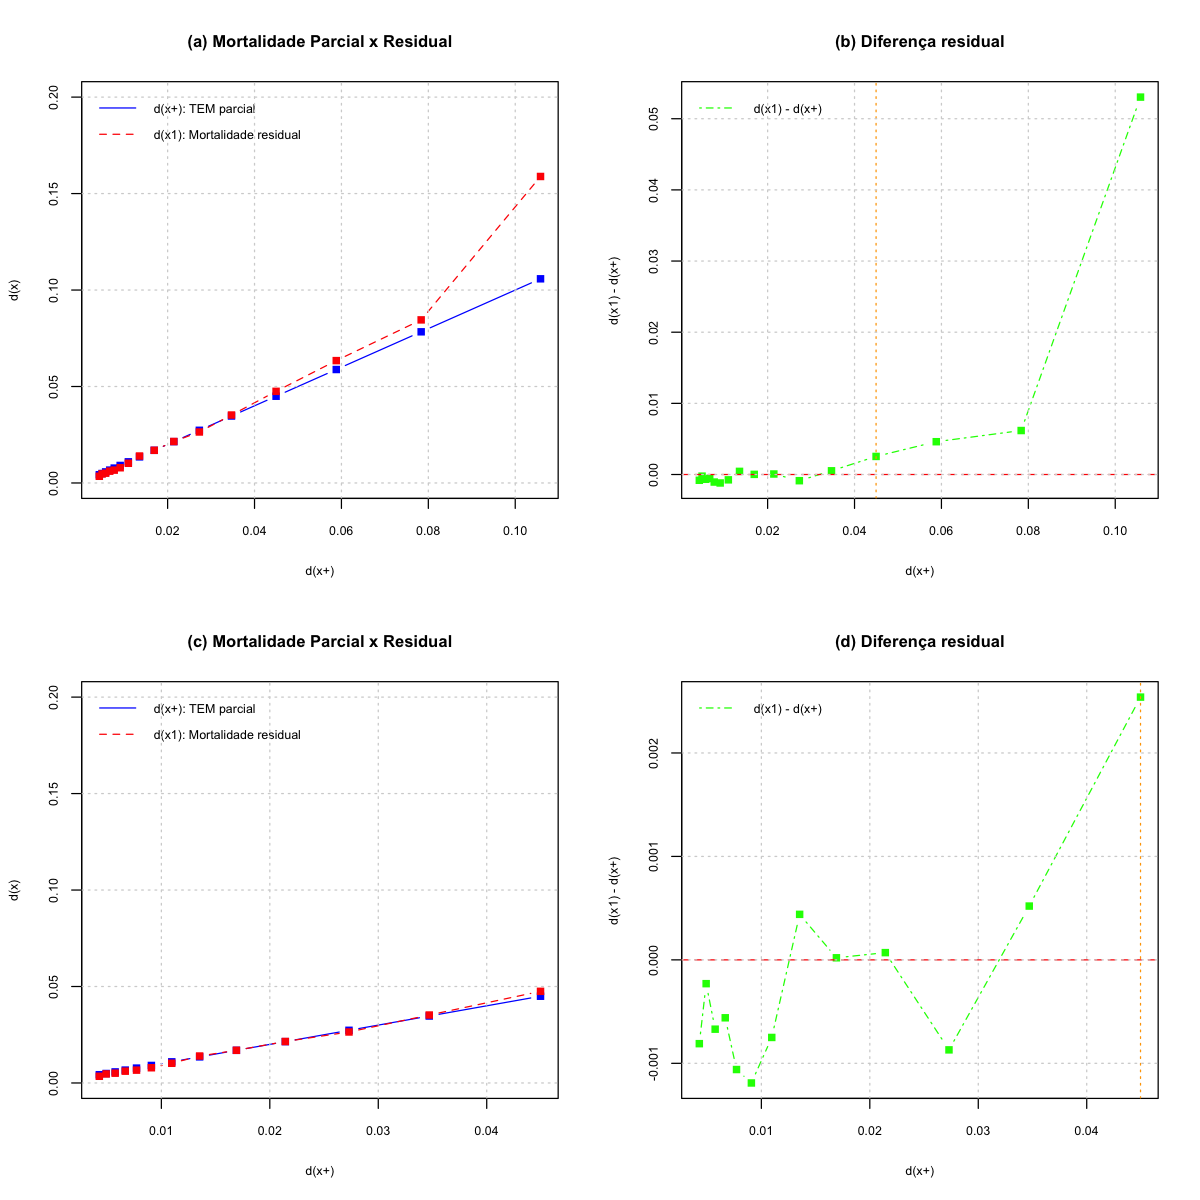

In [3]:
par(mfrow=c(2,2)) 
fontSize = .75
options(repr.plot.width=10, repr.plot.height=10)

# 75 a 79 anos
i = 2
j = 17

# Comparando os residuais com as mortes d(x+)
x = tabGGB$d_a_mais[i:j]
y = tabGGB$d_a_1[i:j]
plot(x, x, type='b', pch=15, col='blue', 
     main = '(a) Mortalidade Parcial x Residual', xlab = 'd(x+)', ylab='d(x)',
     ylim=c(0,0.2),
     cex.lab=fontSize, cex.axis=fontSize, cex.main=1, cex.sub=fontSize)

y = tabGGB$d_a_1[i:j]
lines(x, y, type='b', col='red', pch=15, lty = 2)

legend("topleft", legend=c("d(x+): TEM parcial", "d(x1): Mortalidade residual"), col=c("blue", "red"), 
       lty = 1:2, cex=fontSize,  bty = "n")

grid()

# ---------------------------------------------
# Gráfico de diferença residual (d(x1) - d(x+))
y = tabGGB$d_a_1[i:j] - tabGGB$d_a_mais[i:j]
plot(x, y, type='b', pch=15, col='green',  lty = 4,
     main = '(b) Diferença residual',
     xlab = 'd(x+)',
     ylab='d(x1) - d(x+)',
     cex.lab=fontSize, cex.axis=fontSize, cex.main=1, cex.sub=fontSize)

abline(h=0,lty=2, col='red')
abline(v=0.04496, lty=3, col='orange')

legend("topleft", legend=c("d(x1) - d(x+)"), col=c("green"), 
       lty = 4:4, cex=fontSize,  bty = "n")
grid()

# ----------------------

# 60 a 64 anos
i = 2
j = 14

# Comparando os residuais com as mortes d(x+)
x = tabGGB$d_a_mais[i:j]
y = tabGGB$d_a_1[i:j]
plot(x, x, type='b', pch=15, col='blue', 
  main = '(c) Mortalidade Parcial x Residual',
          ylim=c(0,0.2),
     xlab = 'd(x+)', ylab='d(x)',
  cex.lab=fontSize, cex.axis=fontSize, cex.main=1, cex.sub=fontSize)

y = tabGGB$d_a_1[i:j]
lines(x, y, type='b', col='red', pch=15, lty = 2)

legend("topleft", legend=c("d(x+): TEM parcial", "d(x1): Mortalidade residual"), col=c("blue", "red"), 
       lty = 1:2, cex=fontSize,  bty = "n")

grid()

# ---------------------------------------------
# Gráfico de diferença residual (d(x1) - d(x+))
y = tabGGB$d_a_1[i:j] - tabGGB$d_a_mais[i:j]
plot(x, y, type='b', pch=15, col='green',  lty = 4,
     main = '(d) Diferença residual',
     xlab = 'd(x+)',
     ylab='d(x1) - d(x+)',
     cex.lab=fontSize, cex.axis=fontSize, cex.main=1, cex.sub=fontSize)

abline(h=0, lty=2, col='red')
abline(v=0.04496, lty=3, col='orange')

legend("topleft", legend=c("d(x1) - d(x+)"), col=c("green"), 
       lty = 4:4, cex=fontSize,  bty = "n")
grid()

O calculo dos valores residuais estão apresentados na Tabela 3. No cálculo dos parametros para análise gráfica, foram realizados vários testes para estimar o intercepto variando a faixa etária, excluindo-se os grupos etários mais jovens e de idades mais avançadas, sendo que os resultados variaram minimamente, e os que apresentaram melhor desempenho, apresentando um grau de cobertura Intercensitário de 99%, foram utilizando a faixa de 5 a 70 anos, conforme valores a seguir:

In [4]:
i = 2
j = 14

# Valor do fator de correção.
fatorC = (sd(tabGGB$d_a_1[i:j]) / sd(tabGGB$d_a_mais[2:14]))
cat("Fator de correção: ", round(fatorC,4), "\n")

# O grau de cobertura é o inverso da inclinação da reta, inverso é do fator de correção
grauCobertura = 1 / fatorC
cat("Grau de cobertura: ", round(grauCobertura,4), "\n")

# Intercepto
#intercepto = mean(tabGGB$d_a_1[4:14]) - fatorC * mean(tabGGB$d_a_mais[4:14])
intercepto = mean(tabGGB$d_a_1[i:j]) - fatorC * mean(tabGGB$d_a_mais[i:j])
cat("Intercepto: ", round(intercepto,4), "\n")

# Estimando o grau de cobertura da relação do 1o e 2o Censos
coberturaCensos = exp(intercepto * periodoTempo)
cat("Grau de cobertura Intercensitário: ", round(coberturaCensos,4), "\n\n")

Fator de correção:  1.0616 
Grau de cobertura:  0.942 
Intercepto:  -0.0012 
Grau de cobertura Intercensitário:  0.9882 



Tabela 3. Valores Residuais, valores de ajustes estimados com base no intercepto e inclinação.

In [5]:
# Valores Residuais Ajustados - Estimando valores de ajustes com base no intercepto e inclinação
tabGGB$ajusteV = intercepto + fatorC * tabGGB$d_a_mais

tabAux = tabGGB
colnames(tabAux) <- c("Idade", "N(t1)", "N(t2)", "D(x)", "N1(x+)", "N2(x+)", "D(x+)", "N(x)", "PYL(x+)", "r(x+)", "d(x+)",	"d(a1)", "Valor")
tabAux[c(1,13)]

Idade,Valor
0 a 4 anos,0.003467259
5 a 9 anos,0.003361100
10 a 14 anos,0.004029902
15 a 19 anos,0.004911022
20 a 24 anos,0.005898302
25 a 29 anos,0.007002357
30 a 34 anos,0.008456736
35 a 39 anos,0.010452527
40 a 44 anos,0.013180816
45 a 49 anos,0.016779610


Na figura 2a e 2b, são apresentados o Gráfico de diagnóstico GGB e em escala logarítima, respectivamente. O eixo x mostra as taxas de mortalidade observadas para as idades x+, e o eixo y representa as taxas de mortalidade para as idades x+ derivadas como resíduo das taxas de crescimento e entrada nas idades x+. A estimativa do grau de cobertura é obtida a partir de uma regressão ortogonal nos pontos para os segmentos etários considerados, neste caso, de 5 a 70 anos. A inclinação da reta estima o fator de ajuste necessário para corrigir as taxas de mortalidade observadas, o qual foi 1.0616. O intercepto da reta estimada, o qual apresentou valor de -0.0012, estima da cobertura relativa entre os dois censos. Para nosso caso, as estimativas obtidas são praticamente iguais às taxas observadas, indicando uma boa qualidade das informações, com uma pequena variação é observada nas idades mais avançadas. Podemos concluir ainda que um baixo nível de sub-registros e que a qualidade da declaração de idade também é razoável, uma vez que não existem pontos distantes da reta observada.

Para os grupos etários mais jovens, observa-se, o formato de “barriga”, indicando que a taxa de mortalidade residual superior à observada, o que já era esperado devido a melhor cobertura das informações de mortalidade para jovens adultos. Conforme mencionado, nas últimas idades, observa-se também um maior valor estimado que observado, indicando possíveis problemas com a declaração de idade para os grupos mais velhos, comportamento também já esperado. De forma geral, os resultados apresentam um ajuste muito bom para a mortalidade adulta (os pontos ficam sobre a reta), indicando boa qualidade na informação da idade e da estrutura etária obtida a partir das informações utilizadas neste trabalho.

Com relação as probabilidades de morte, apresentados nos gráficos 2c, 2d, 2e e 2f, a curva ajustada é superior a observada em todas os pontos, indicando que a expectativa de vida esta sendo superestimada. Podemos observar um declinio da probabilidade de morte da faixa de 10 a 15 anos, com relação a faixa anterior, e um notável aumento a partir dos 15 anos, que tende a se estabilizar dos 20 aos 40 anos, quando novamente aumenta quase que linearmente até o final da vida. Comparando o observado com estimado, notamos ainda que nesta faixa etária (20-40) um maior distanciamente entre observado e esperado, indicando expectativa de vida maior mais discrepante que nas demais idades. A Tabela 4 apresenta o cáculo de TEM e probabilidades de morte q(x) observadas e ajustados pelo método GGB.

Tabela 4. Cáculo de TEM e probabilidades de morte q(x) ajustados pelo método GGB.

In [6]:
# Cáculo de probabilidades de morte

#Taxa específica de mortalidade observada
tabGGB$temj = tabGGB$mortes/round(sqrt(as.numeric(tabGGB$pop1)*as.numeric(tabGGB$pop2)))

# Taxa específica de mortalidade ajustada 
tabGGB$ggbadj = tabGGB$temj/grauCobertura

# 5qa observado
tabGGB$q_a_obs = round(tabGGB$temj*(10/2+5*tabGGB$temj), 5)

# 5qa ajustado GGB
tabGGB$q_a_adj = round(tabGGB$ggbadj*(10/2+5*tabGGB$ggbadj), 5)

tabAux = tabGGB
colnames(tabAux) <- c("Idade", "N(t1)", "N(t2)", "D(x)", "N1(x+)", "N2(x+)", "D(x+)", "N(x)", "PYL(x+)", "r(x+)", "d(x+)",	"d(a1)", "Valor",
                      "TEM observada", "TEM ajustada", "q(x) observada", "q(x) ajustado")

tabAux[c(1,14,15,16,17)]

Idade,TEM observada,TEM ajustada,q(x) observada,q(x) ajustado
0 a 4 anos,0.0051533499,0.0054707499,0.02590,0.02750
5 a 9 anos,0.0004380453,0.0004650249,0.00219,0.00233
10 a 14 anos,0.0004236675,0.0004497616,0.00212,0.00225
15 a 19 anos,0.0013685687,0.0014528602,0.00685,0.00727
20 a 24 anos,0.0022847953,0.0024255181,0.01145,0.01216
25 a 29 anos,0.0023926063,0.0025399692,0.01199,0.01273
30 a 34 anos,0.0024685683,0.0026206099,0.01237,0.01314
35 a 39 anos,0.0028101488,0.0029832286,0.01409,0.01496
40 a 44 anos,0.0037709807,0.0040032391,0.01893,0.02010
45 a 49 anos,0.0051721476,0.0054907053,0.02599,0.02760


Figura 2. Gráficos de diagnostico e probabilidade de morte ajustados pelo método GGB.

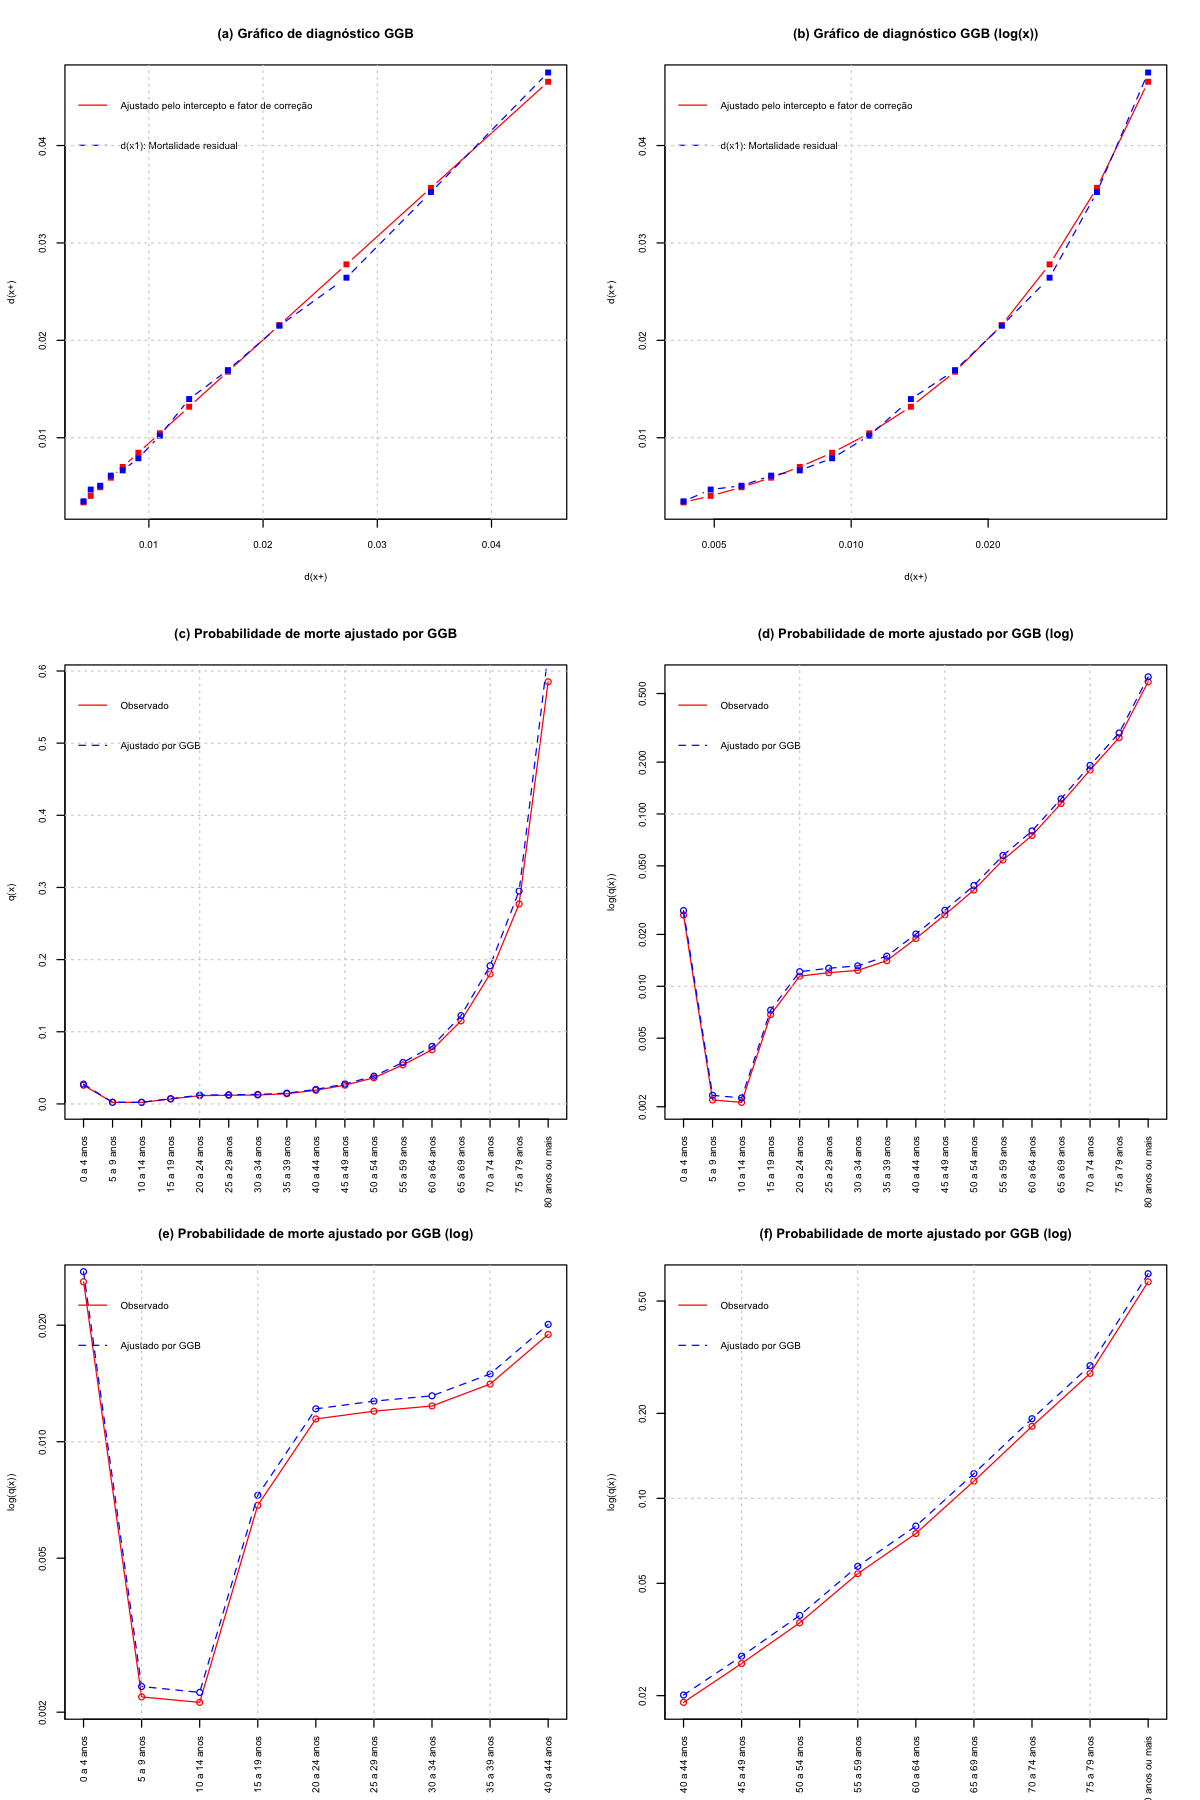

In [7]:
par(mfrow=c(3,2)) 
fontSize = .75
options(repr.plot.width=10, repr.plot.height=15)

# --------------------------------------
x = tabGGB$d_a_mais[2:14]
y = tabGGB$ajusteV[2:14]
y1 = tabGGB$d_a_1[2:14]

plot(x, y, type='b', pch=15, col='red', lty = 1,
     main = '(a) Gráfico de diagnóstico GGB',
     xlab = 'd(x+)',
     ylab='d(x+)',
     cex.lab=fontSize, cex.axis=fontSize, cex.main=1, cex.sub=fontSize)

# Comparando os residuais com  as mortes da+
lines(x, y1, lty = 2, type='b', col='blue', pch=15)

legend("topleft", legend=c("Ajustado pelo intercepto e fator de correção", "d(x1): Mortalidade residual"),
       col=c("red", "blue"), lty = 1:3, cex=fontSize,  bty = "n")

grid()

# --------------------------------------
x = tabGGB$d_a_mais[2:14]
y = tabGGB$ajusteV[2:14]
y1 = tabGGB$d_a_1[2:14]

plot(x, y, type='b', pch=15, col='red', lty = 1, log="x",
     main = '(b) Gráfico de diagnóstico GGB (log(x))',
     xlab = 'd(x+)',
     ylab='d(x+)',
     cex.lab=fontSize, cex.axis=fontSize, cex.main=1, cex.sub=fontSize)

# Comparando os residuais com  as mortes da+
lines(x, y1, lty = 2, type='b', col='blue', pch=15)

legend("topleft", legend=c("Ajustado pelo intercepto e fator de correção", "d(x1): Mortalidade residual"),
       col=c("red", "blue"), lty = 1:3, cex=fontSize,  bty = "n")

grid()

# --------------------------------------
# Probabilidade de morte q(x) 
x = tabGGB$idade#[1:14]
y = tabGGB$q_a_obs#[1:14]
y1 = tabGGB$q_a_adj#[1:14]

# q(x) observado
plot(y, type = "o", col = "red", xlab = "", ylab = "q(x)", xaxt="n",
     main = "(c) Probabilidade de morte ajustado por GGB", 
     cex.lab=fontSize, cex.axis=fontSize, cex.main=1, cex.sub=fontSize)

# q(x) Ajustado
lines(y1, type = "o", lty = 2, col = "blue")

legend("topleft", legend=c("Observado", "Ajustado por GGB"),
       col=c("red", "blue"), lty = 1:2, cex=fontSize,  bty = "n")

axis(1, at=c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17), labels=x, las=2, cex.axis=fontSize)
grid()

# --------------------------------------
# Probabilidade de morte q(x) 
x = tabGGB$idade#[2:14]
y = tabGGB$q_a_obs#[2:14]
y1 = tabGGB$q_a_adj#[2:14]

# q(x) observado
plot(y, type = "o", col = "red", xlab = "", ylab = "log(q(x))", xaxt="n", log="y",
     main = "(d) Probabilidade de morte ajustado por GGB (log)", 
     cex.lab=fontSize, cex.axis=fontSize, cex.main=1, cex.sub=fontSize)

# q(x) Ajustado
lines(y1, type = "o", lty = 2, col = "blue")

legend("topleft", legend=c("Observado", "Ajustado por GGB"),
       col=c("red", "blue"), lty = 1:2, cex=fontSize,  bty = "n")

axis(1, at=c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17), labels=x, las=2, cex.axis=fontSize)
grid()

# --------------------------------------
# Probabilidade de morte q(x)
i = 1
j = 9
x = tabGGB$idade[i:j]
y = tabGGB$q_a_obs[i:j]
y1 = tabGGB$q_a_adj[i:j]

# q(x) observado
plot(y, type = "o", col = "red", xlab = "", ylab = "log(q(x))", xaxt="n",  log="y",
     main = "(e) Probabilidade de morte ajustado por GGB (log)", 
     cex.lab=fontSize, cex.axis=fontSize, cex.main=1, cex.sub=fontSize)

# q(x) Ajustado
lines(y1, type = "o", lty = 2, col = "blue")

legend("topleft", legend=c("Observado", "Ajustado por GGB"),
       col=c("red", "blue"), lty = 1:2, cex=fontSize,  bty = "n")

axis(1, at=c(1,2,3,4,5,6,7,8,9), labels=x, las=2, cex.axis=fontSize)
grid()

# --------------------------------------
# Probabilidade de morte q(x)
i = 9
j = 17
x = tabGGB$idade[i:j]
y = tabGGB$q_a_obs[i:j]
y1 = tabGGB$q_a_adj[i:j]

# q(x) observado
plot(y, type = "o", col = "red", xlab = "", ylab = "log(q(x))", xaxt="n",  log="y",
     main = "(f) Probabilidade de morte ajustado por GGB (log)", 
     cex.lab=fontSize, cex.axis=fontSize, cex.main=1, cex.sub=fontSize)

# q(x) Ajustado
lines(y1, type = "o", lty = 2, col = "blue")

legend("topleft", legend=c("Observado", "Ajustado por GGB"),
       col=c("red", "blue"), lty = 1:2, cex=fontSize,  bty = "n")

axis(1, at=c(1,2,3,4,5,6,7,8,9), labels=x, las=2, cex.axis=fontSize)
grid()

## Aplicação do método Synthetic Extinct Generations (SEG)

O método de Gerações Extintas Sintéticas (SEG) é uma generalização do método de Preston e Coale para estimar cobertura de registros de mortes em relação a uma população estimada, desenvolvida por Bennett e Horiuchi (1981, 1984). O método postula que em uma população fechada, o número de pessoas vivas, de uma determinada idade "a", em um determinado momento, deve ser igual ao número de pessoas que morrerão a partir dessa idade.

O método se baseiam na idéia de que o fluxo futuro de mortes de uma coorte pode ser substituído pelo número de mortes correntes de cada idade acima de "a", se os efeitos do futuro crescimento populacional específico por idade puderem ser levados em consideração. O exemplo mais simples é uma população estacionária (tábua de vida), na qual as mortes futuras acima da idade "a" serão iguais às mortes atuais acima dessa idade.

No caso de uma população é estável, se os dados relatados forem precisos, o número de mortes na idade "x", "t" anos no futuro, será igual ao número de mortes na idade "x" atualmente, multiplicado por taxa de crescimento (exp(rt)).

No caso mais geral em que a população não é estável, existe uma relação equivalente se substituirmos esta taxa de crescimentopor uma taxa de crescimento (específica) da população com idade "y" no tempo "t". Se as mortes relatadas no tempo "t" puderem ser assumidas como relatadas na mesma extensão (c), em cada idade adulta, então, a estimativa do número futuro de mortes da coorte será subestimada na mesma extensão.

Assim, é possível estimar a completude do registro de óbitos dividindo a soma das estimativas de futuros óbitos da coorte, derivada do número de óbitos em qualquer data, pela população na mesma data. As taxas de mortalidade podem então ser estimadas dividindo o número de mortes relatadas em cada grupo de idade adulta por "c" e dividindo esses números por uma estimativa da população exposta ao risco com base na população usada para estimar as taxas parciais de natalidade e mortalidade (SEG-IUSSP, 2020).

O método SEG assume os seguintes pressupostos:

* Número de indivíduos, por faixa etária quinquenal (e para o intervalo aberto) em dois momentos;
* Número de mortes por faixa etária quinquenal (e para o intervalo aberto);
* A cobertura de cada censo é a mesma para todas as idades;
* A integridade do relato de mortes é a mesma para todas as idades acima de uma idade mínima;
* A população está fechada à migração.


### Calculando funçoes do método SEG

Similarmente ao método GGB, para os cálculos vamos considerar N(t1) sendo a população do primeiro censo, N(t2) a população do segundo censo e D(x) a média de mortes por ano no período (para cada um dos grupos quinquenais). Em seguida serão calculados as seguintes funcões:

* N(x): número de pessoas que 'nasceram' no intervalo de idade aberto x+ na população ("Aniversário");
* r(x): taxas de crescimento estimada;
* r(x+): taxas parcias de crescimento;
* d(x): Mortes na tabela de vida;
* N'(x): População estimada;
* c(x): Grau de cobertura para cada idade.

A definição formal das fórmulas está d está disponível na documentação do "Tools for Demographic Estimation" do [IUSSP](http://demographicestimation.iussp.org/content/synthetic-extinct-generations-methods) (SEG-IUSSP, 2020)). A Tabela 5 apresenta o resultado dos cálculos das funções utilizadas pelo método SEG.


Tabela 5. Funçoes do método SEG

In [8]:
# Recuperando os dados originais
tabSEG = df

# N(x)
tabSEG$aniversario = 0

for (i in 2:ultimaLinha) {
  popFaixaAnterior = as.numeric(tabSEG$pop1[i-1]) 
  popFaixaAtual = as.numeric(tabSEG$pop2[i])
  tabSEG$aniversario[i] = round(0.2 * sqrt(popFaixaAnterior * popFaixaAtual))
}

# Taxa de crescimento r(x)
for (i in 1:ultimaLinha) {
  tabSEG$cresc[i] = round(log(tabSEG$pop2[i]/tabSEG$pop1[i])/periodoTempo, digits=5)
}

# r(x+): Taxa de crescimento parcial
tabSEG$cum_cresc[i] = 0

# 1a idade
tabSEG$cum_cresc[1] = round(2.5 * tabSEG$cresc[1], 5)

# Demais idades
for (i in 2:ultimaLinha) {
  tabSEG$cum_cresc[i] = round(2.5 * tabSEG$cresc[i] + 5 * sum(tabSEG$cresc[(i-1):1]), 5)
}

# Mortes na tabela de vida, utilizado para estimar esperança de vida intervalo aberto e(x+)
for (i in 1:ultimaLinha) {
  tabSEG$morte_tab[i] = round(tabSEG$mortes[i] * exp(tabSEG$cum_cresc[i]), digits=0)
}

# Razao entre mortes de 10-40/40-60 usado para estimar intervalo aberto
razao = round(sum(tabSEG$morte_tab[3:8])/sum(tabSEG$morte_tab[9:12]), digits=3)

# Com base nos valores dessa razão, procura-se em tabua modelo a esperança de vida equivalente em intervalo aberto. 
# Interpolacao para gerar mortes em intervalo aberto.
# Para homens - coeff retirados do artigo Bennett and Horiuchi - Valores sexo masculino tabua modelo Oeste.
aberto = round(4.5 + ((0.725 - razao) / (0.725-0.689)) * (4.61 - 4.5), digits=2)

# População Estimada N'(x)
tabSEG$pop_a = 0

# D*(exp(e(x)+*r+)-(e(x)+*r+)^2/6)
tabSEG$pop_a[ultimaLinha] = round(tabSEG$mortes[ultimaLinha] * (exp(aberto * tabSEG$cresc[ultimaLinha]) - ((aberto * tabSEG$cresc[ultimaLinha])^2/6)), digits=0)

# População estimada para os demais grupos etários: Nx + 5 * exp(5*r) + Dx * exp(2, 5*r)
for (i in ultimaLinha:1) {
  tabSEG$pop_a[i-1] = round(tabSEG$pop_a[i] * exp(5*tabSEG$cresc[i-1]) +
    tabSEG$mortes[i-1] * exp(2.5 * tabSEG$cresc[i-1]), digits=0)}

# Grau de cobertura para cada idade
tabSEG$Cx = round(tabSEG$pop_a/tabSEG$aniversario, digits=2)

tabAux = tabSEG
colnames(tabAux) <- c("Idade", "N(t1)", "N(t2)", "D(x)", "N(x)", "r(x)", "r(x+)", "d(x)", "N'(x)", "c(x)"  )
tabAux[c(1,5,6,7,8,9,10)]


Idade,N(x),r(x),r(x+),d(x),N'(x),c(x)
0 a 4 anos,0,-0.00394,-0.00985,979,38147,Inf
5 a 9 anos,39173,0.00437,-0.00878,83,37907,0.97
10 a 14 anos,39072,0.01740,0.04565,83,37005,0.95
15 a 19 anos,35328,0.00886,0.11130,267,33846,0.96
20 a 24 anos,33729,0.01659,0.17492,426,32146,0.95
25 a 29 anos,30501,0.03249,0.29762,442,29244,0.96
30 a 34 anos,25792,0.03891,0.47612,467,24557,0.95
35 a 39 anos,21255,0.03249,0.65462,537,19952,0.94
40 a 44 anos,18194,0.03786,0.83050,702,16703,0.92
45 a 49 anos,14678,0.04276,1.03205,940,13544,0.92


O calculo dos valores residuais estão apresentados na Tabela 3. No cálculo dos parametros para análise gráfica, foram realizados vários testes para estimar o intercepto variando a faixa etária, excluindo-se os grupos etários mais jovens e de idades mais avançadas, sendo que os resultados variaram minimamente, e os que apresentaram melhor desempenho, apresentando um grau de cobertura Intercensitário de 99%, foram utilizando a faixa de 5 a 70 anos, conforme valores a seguir:

**Análise e explicação**

In [9]:
cat("Dos 30 aos 69 anos", "\n")
grauDeCobertura_69 = round(mean(tabSEG$Cx[6:15]), 2)
cat("Grau de cobertura: ", round(grauDeCobertura_69,4), "\n")

# Fator de correção
fatorC_69 = 1/mean(tabSEG$Cx[6:15])
cat("Fator de correção: ", round(fatorC_69,4), "\n", "\n")

cat("Dos 5 aos 69 anos", "\n")
grauDeCobertura_79 = round(mean(tabSEG$Cx[2:14]), 2)
cat("Grau de cobertura: ", round(grauDeCobertura_79,4), "\n")

# Fator de correção
fatorC_79 = 1/mean(tabSEG$Cx[2:14])
cat("Fator de correção: ", round(fatorC_79,4), "\n")


Dos 30 aos 69 anos 
Grau de cobertura:  0.92 
Fator de correção:  1.0893 
 
Dos 5 aos 69 anos 
Grau de cobertura:  0.93 
Fator de correção:  1.0708 


O método SEG, usa taxas de crescimento específicas por idade para converter uma distribuição de óbitos por idade em uma distribuição etária de população. Uma vez que em uma população os óbitos observados a partir de uma idade x são iguais à população da idade x, ajustada pela taxa de crescimento populacional por intervalo etário, temos que os óbitos de uma população na idade x+ fornecem uma estimativa da população da idade x. O grau de cobertura do registro de óbitos será dado, então, pela razão entre os óbitos estimados pela população acima da idade x e a população observada acima da idade x (QUEIROZ, 2017).

O gráfico 3 apresenta o grau de cobertura, o qual é relativamente constante até os 35 anos, quando então observa-se uma mudança na inclinação negativa ao longo dos grupos etários seguintes, que pode indicar possíveis problemas de cobertura, declaração de idade, ou variação na qualidade do registro dos óbitos por grupos (enumeração). Este comportamento corrobora com o valor de grau de cobertura encontrado, que foi de 93%. Este declínio acentua-se ainda mais a partir de 60 anos é consistente d uma piora na qualidade da informação a partir dessa idade. A Tabela 6 apresenta o cáculo de TEM e probabilidades de morte q(x) observadas e ajustados pelo método GGB.

Tabela 6. Cáculo de TEM e probabilidades de morte q(x) pelo método SEG.

In [10]:
# Ajustada com referencia 30 a 69 anos
# TEM observada
tabSEG$temj = round(tabSEG$mortes/round(sqrt(as.numeric(tabSEG$pop1) * as.numeric(tabSEG$pop2))), 5)

# TEM ajustada
tabSEG$bhadj = round(tabSEG$temj / mean(tabSEG$Cx[2:14]) ,5)

# Probabilidade de morte q(x)
# 5qa observado
tabSEG$q_a_obs = round(tabSEG$temj*10/(2+5*tabSEG$temj), 5)

# 5qa ajustado SEG
tabSEG$q_a_adj = round(tabSEG$bhadj*10/(2+5*tabSEG$bhadj), 5)

tabAux = tabSEG
colnames(tabAux) <- c("Idade", "N(t1)", "N(t2)", "D(x)", "N(x)", "r(x)", "r(x+)", "d(x)", "N'(x)", "c(x)", 
                   "TEM observada", "TEM ajustada", "q(x) observada", "q(x) ajustado")
tabAux[c(1,11,12,13,14)]

Idade,TEM observada,TEM ajustada,q(x) observada,q(x) ajustado
0 a 4 anos,0.00515,0.00551,0.02542,0.02718
5 a 9 anos,0.00044,0.00047,0.00220,0.00235
10 a 14 anos,0.00042,0.00045,0.00210,0.00225
15 a 19 anos,0.00137,0.00147,0.00683,0.00732
20 a 24 anos,0.00228,0.00244,0.01134,0.01213
25 a 29 anos,0.00239,0.00256,0.01188,0.01272
30 a 34 anos,0.00247,0.00264,0.01227,0.01311
35 a 39 anos,0.00281,0.00301,0.01395,0.01494
40 a 44 anos,0.00377,0.00404,0.01867,0.02000
45 a 49 anos,0.00517,0.00554,0.02552,0.02732


Figura 3. Gráficos de diagnostico e probabilidade de morte ajustados pelo método SEG.

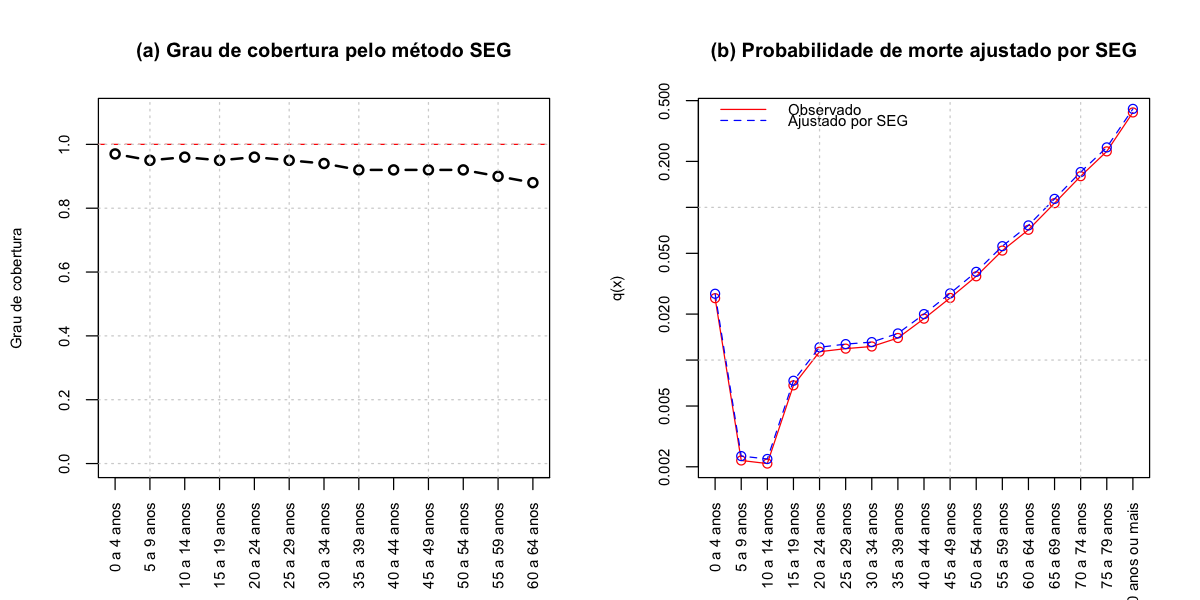

In [11]:
par(mfrow=c(1,2)) 
fontSize = .75
options(repr.plot.width=10, repr.plot.height=5)

x = tabSEG$idade#[2:14]

# --------------------------------------
plot(tabSEG$Cx[2:14], type='b', lwd=2, xaxt="n",
     ylim=c(0,1.1),
     main='(a) Grau de cobertura pelo método SEG', xlab='', ylab='Grau de cobertura',
     cex.lab=fontSize, cex.axis=fontSize, cex.main=1, cex.sub=fontSize)

abline(h=1,lty=2, col='red')
axis(1, at=c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17), labels=x, las=2, cex.axis=fontSize)
grid()

# --------------------------------------
# Probabilidade de morte q(x) 
y = tabSEG$q_a_obs#[1:14]
y1 = tabSEG$q_a_adj#[1:14]

# q(x) observado
plot(y, type = "o", col = "red", xlab = "", ylab = "q(x)", xaxt="n", log="y", 
#     ylim=c(0,1.1),
     main = "(b) Probabilidade de morte ajustado por SEG", 
     cex.lab=fontSize, cex.axis=fontSize, cex.main=1, cex.sub=fontSize)

# q(x) Ajustado
lines(y1, type = "o", lty = 2, col = "blue")

legend("topleft", legend=c("Observado", "Ajustado por SEG"), 
       col=c("red", "blue"), lty = 1:2, cex=fontSize,  bty = "n")

axis(1, at=c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17), labels=x, las=2, cex.axis=fontSize)
grid()

Os gráficos 4 e 5 apresentam comparativos das probabilidades de morte observadas e estimadas. Nas figuras do gráfico 4, podemos observar que as estruturas de mortalidade observadas e estimadas são similares, tendo sido ajustados apenas os níveis, os quais são maiores em ambos ajustes realizados. As taxas ajustadas são praticamente identicas até os 60 anos, quando o ajuste pelo GBB passa a apresentar um maior nível, e o ajuste pelo SEG passa a se aproximar do observado. Já nas figuras do gráfico 5, a probabilidade de morte foi comparada com valores observados de uma tábua de vida. Podemos observar que as estruturas de mortalidade observadas e estimadas também são similares, exceto na faixa etária de 5 a 9 anos. Todavia os níveis da curva observada neste caso são muito superiores às ajustadas, com um ponto de covergências nos 25 anos, e com um aumenta acentuado após os 75 anos.

Figura 4. Gráficos comparativos de probabilidade de morte ajustados pelo método GGB e SEG.

In [12]:
# Função genérica para plotar os gráficos de q(x)
myPlots <- function(range, title) {
    x = tabSEG$idade[i:j]
    y = tabSEG$q_a_obs[i:j]
    y1 = tabGGB$q_a_adj[i:j]
    y2 = tabSEG$q_a_adj[i:j]
    # q(x) observado
    plot(y, type = "o", col = "red", xlab = "", ylab = "q(x)", xaxt="n", log="y",
        #ylim = c(0,s),
        main = title,
        cex.lab=fontSize, cex.axis=fontSize, cex.main=1, cex.sub=fontSize)

    # q(x) Ajustado
    lines(y1, type = "o", lty = 2, col = "blue")

    # q(x) Ajustado
    lines(y2, type = "o", lty = 3, col = "green")

    legend("topleft", legend=c("Observado", "GGB", "SEG"),
       col=c("red", "blue", "green"), lty = 1:3, cex=fontSize,  bty = "n")

    axis(1, at=range, labels=x, las=2, cex.axis=fontSize)
    grid()
}

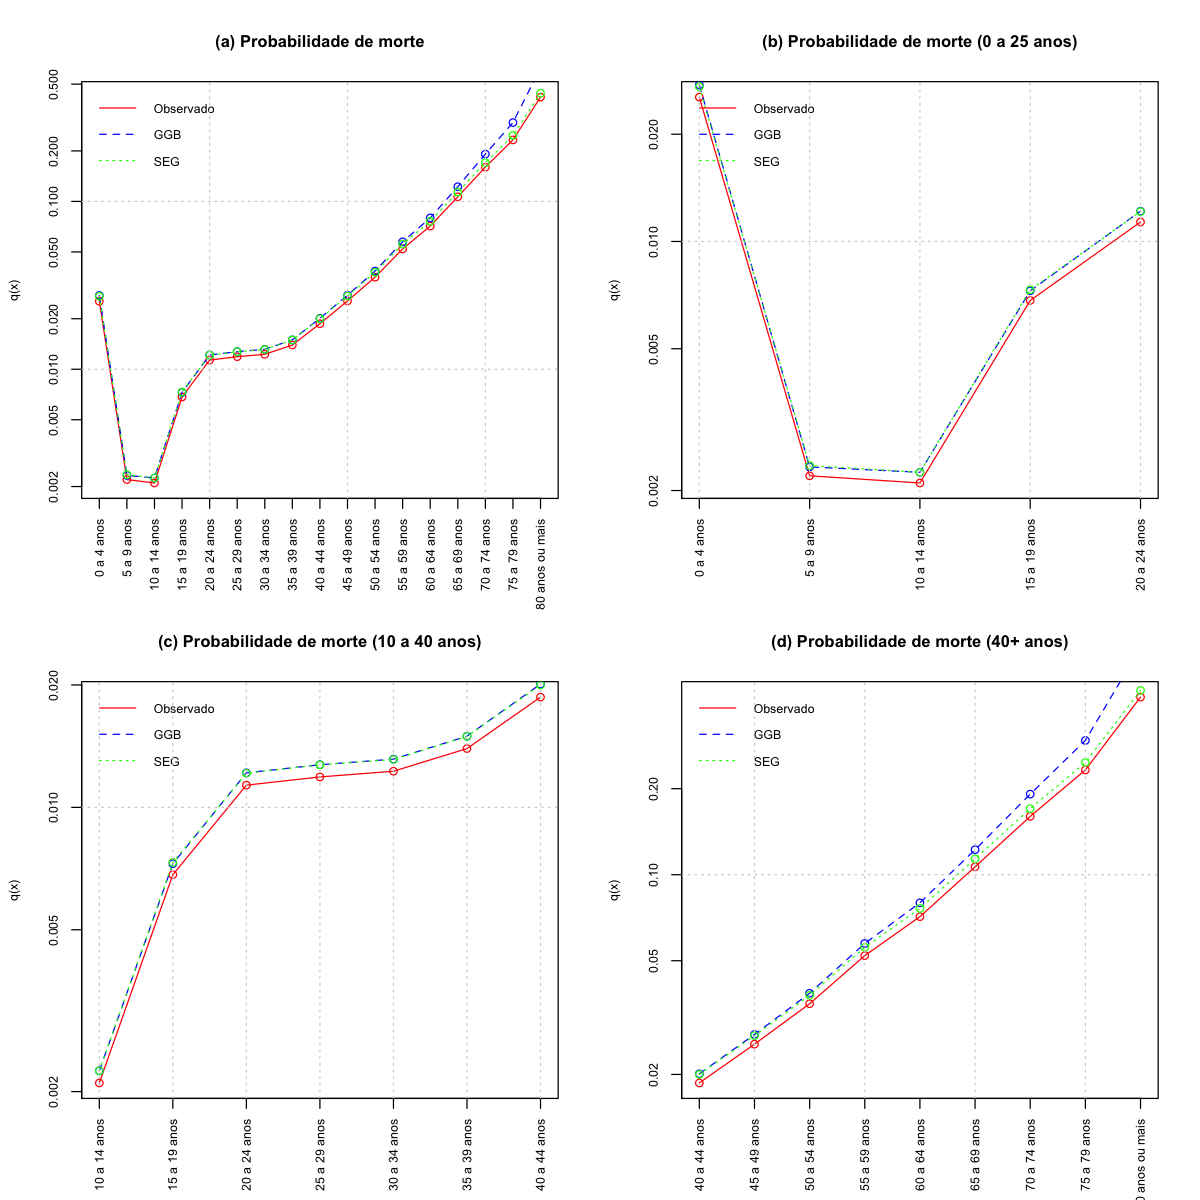

In [13]:
par(mfrow=c(2,2))
fontSize = .75
options(repr.plot.width=10, repr.plot.height=10)

# --------------------------------------
# Probabilidade de morte q(x) 
i = 1
j = 17
myPlots(c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17), "(a) Probabilidade de morte")

# --------------------------------------
# Probabilidade de morte q(x)
i = 1
j = 5
myPlots(c(1,2,3,4,5), "(b) Probabilidade de morte (0 a 25 anos)")

# Grupos etários de 10 a 40
i = 3
j = 9
myPlots(c(1,2,3,4,5,6,7), "(c) Probabilidade de morte (10 a 40 anos)")


# Grupos etários de 40 a 70
i = 9
j = 17
myPlots(c(1,2,3,4,5,6,7,8,9), "(d) Probabilidade de morte (40+ anos)")

Figura 5. Gráficos comparativos de probabilidade de morte ajustados pelo método GGB e SEG, e observada de uma tábua de vida.

In [14]:
# Função genérica para plotar os gráficos
tabuaHomens = read.csv("dados/Tabua-Homens-2010-AM.csv", sep=',', header = T)

myPlots2 <- function(range,title, m,n) {
    x = tabSEG$idade[i:j]
    y = tabuaHomens$nqx[m:n]
    y1 = tabGGB$q_a_adj[i:j]
    y2 = tabSEG$q_a_adj[i:j]
    # q(x) observado
    plot(y, type = "o", col = "red", xlab = "", ylab = "q(x)", xaxt="n", log="y",
     main = title, 
     cex.lab=fontSize, cex.axis=fontSize, cex.main=1, cex.sub=fontSize)

    # q(x) Ajustado
    lines(y1, type = "o", lty = 2, col = "blue")

    # q(x) Ajustado
    lines(y2, type = "o", lty = 3, col = "green")

    legend("topleft", legend=c("Tábua de vida", "GGB", "SEG"),
       col=c("red", "blue", "green"), lty = 1:3, cex=fontSize,  bty = "n")

    axis(1, at=range, labels=x, las=2, cex.axis=fontSize)
    grid()
}

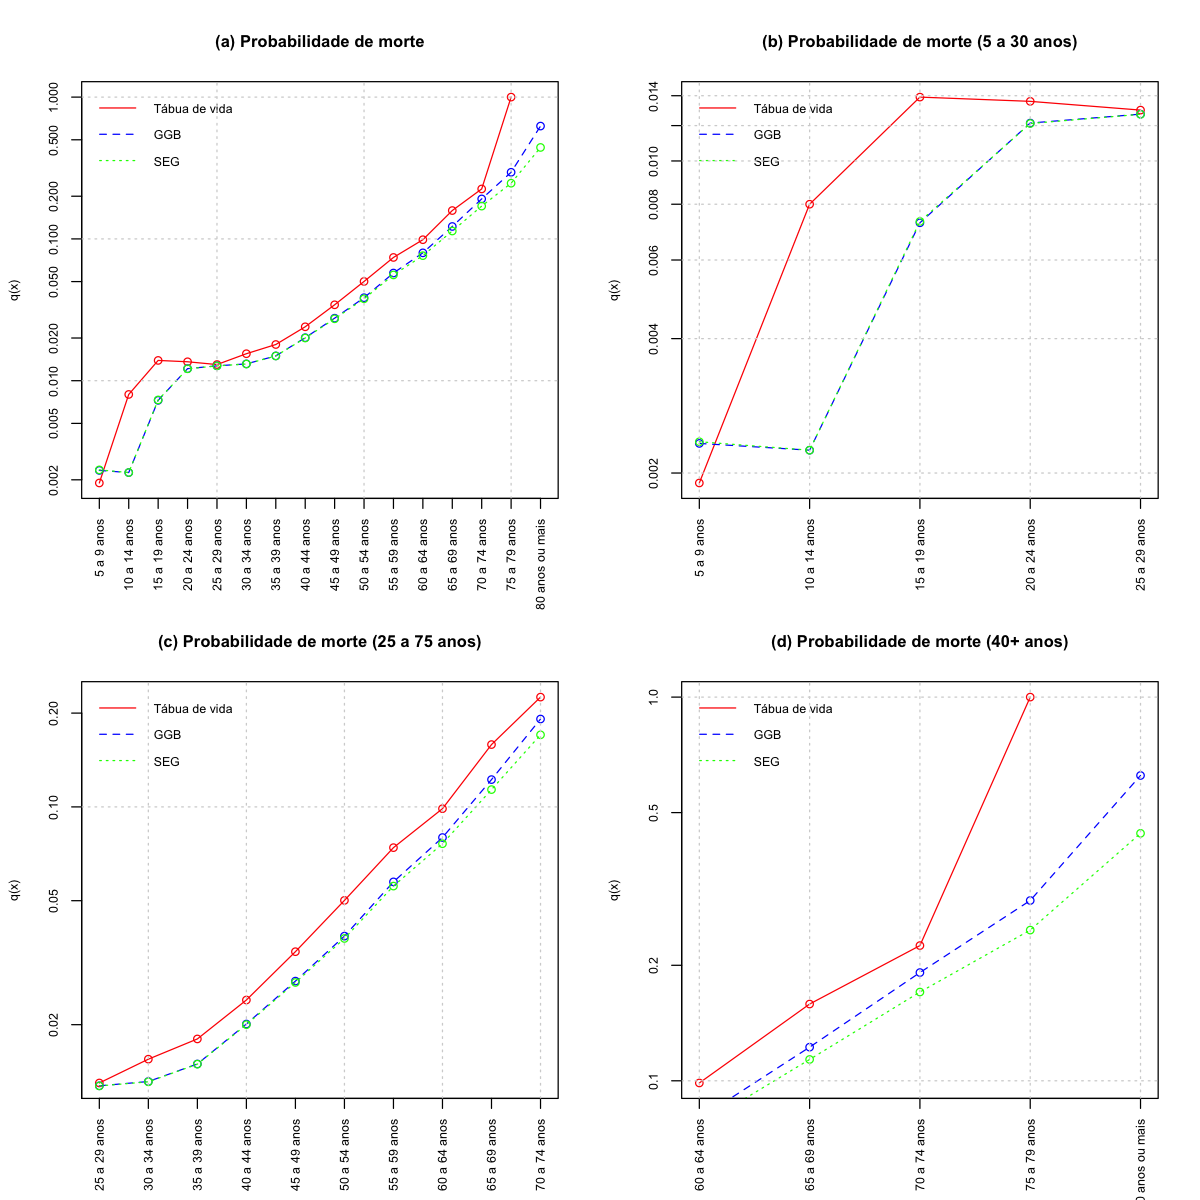

In [15]:
par(mfrow=c(2,2))
fontSize = .75
options(repr.plot.width=10, repr.plot.height=10)

# --------------------------------------
# Probabilidade de morte q(x) 
i = 2
j = 17
myPlots2(c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16), "(a) Probabilidade de morte", i+2, j+2)

# --------------------------------------
# Probabilidade de morte q(x)
i = 2
j = 6
myPlots2(c(1,2,3,4,5), "(b) Probabilidade de morte (5 a 30 anos)", i+2, j+2)

# Grupos etários de 10 a 40
i = 6
j = 15
myPlots2(c(1,2,3,4,5,6,7,8,9,10), "(c) Probabilidade de morte (25 a 75 anos)", i+2, j+2)


# Grupos etários de 40 a 70
i = 13
j = 17
myPlots2(c(1,2,3,4,5), "(d) Probabilidade de morte (40+ anos)", i+2, j+2)

# Referências

AGOSTINHO, C S.; Queiroz, B L. (2008) Estimativas da mortalidade adulta para o Brasil no período 1980/2000: uma abordagem metodológica comparativa.

AGOSTINHO, C S. (2009). Estudo sobre a mortalidade adulta, para Brasil entre 1980 e 2000 e Unidades da Federação em 2000: uma aplicação dos métodos de distribuição de mortes. Tese de Doutorado. Centro de Desenvolvimento e Planejamento Regional Faculdade de Ciências Econômicas - UFMG. Belo Horizonte, MG.

BENNETT, N. G.; HORIUCHI, S. (1981) Estimating the completeness of death registration in a closed population. Population Index, vol.47, n.2, p. 207-221

GGB-IUSSP. (2020). The Generalized Growth Balance Method. Disponível em http://demographicestimation.iussp.org/content/generalized-growth-balance-method.

HILL K. (1987) "Estimating census and death registration completeness", Asian and Pacific Census Forum 1(3):8-13, 23-24. http://hdl.handle.net/10125/3602.

HILL,K.eCHOI,Y. (2004) Death distribution methods for estimating adult mortality: sensitivity analysis with simulated data errors. Adult mortality in developing countries workshop. The Marconi Center, Marin County, California, July 2004. 

JORGE, M.H.P. M. e GOTLIEB, S.L.D. (2000) As Condições de Saúde no Brasil: Retrospecto de 1979 a 1995. Rio de Janeiro: Editora FIOCRUZ.

MINISTÉRIO DA SAÚDE (2001) Anuário Estatístico de Saúde do Brasil, 2001. Disponível online em http://portal.saude.gov.br/portal/aplicacoes/anuario2001/index.cfm. Acessado em 14/02/2008.

PRESTON, S. H.; ELO, I. T.; STEWART, Q. (1999) Effects of age misreporting on mortality estimates at older ages. Population Studies, v.53, n.2, p. 165-177
Brass W. 1975. Methods for Estimating Fertility and Mortality from Limited and Defective Data. Chapel Hill NC: Carolina Population Centre.

PRESTON, S., COALE, A.J., TRUSSELL, J., MAXINE, W. (1980) Estimating the completeness of reporting of adult deaths in populations that are approximately stable. Population Studies, vol. 46, n. 2, summer, 1980, pg. 179-202.

QUEIROZ, Bernardo Lanza et al. Estimativas do grau de cobertura e da mortalidade adulta (45q15) para as unidades da federação no Brasil entre 1980 e 2010. Rev. bras. epidemiol.,  São Paulo ,  v. 20, supl. 1, p. 21-33,  May  2017 .   Available from <http://www.scielo.br/scielo.php?script=sci_arttext&pid=S1415-790X2017000500021&lng=en&nrm=iso>. Acessado em  08/12/2020.  https://doi.org/10.1590/1980-5497201700050003.

SEG-IUSSP. (2020). The Generalized Growth Balance Method. Disponível em http://demographicestimation.iussp.org/content/synthetic-extinct-generations-methods.

UN Population Division. (1983) Manual X: Indirect Techniques for Demographic Estimation. New York: United Nations, Department of Economic and Social Affairs, ST/ESA/SER.A/81. http://www.un.org/esa/population/techcoop/DemEst/manual10/manual10.html

UN Population Division. (2002) Methods for Estimating Adult Mortality. New York: United Nations, Department of Economic and Social Affairs, ESA/P/WP.175. http://www.un.org/esa/population/techcoop/DemEst/methods_adultmort/methods_adultmort.html